In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/');
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# cut selection in a selected  box dimensions for $\frac{\Delta Q_{track}}{\Delta Q_{total}}$ 

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/'

In [3]:
N_box_sizes = 30
MinNwiresBox,dNwiresBox = 5,5
MinNticksBox,dNticksBox = 10,10
NwiresBox,NticksBox=[],[]
for i_box_size in range(N_box_sizes):
    NwiresBox.append(MinNwiresBox + i_box_size * dNwiresBox)
    NticksBox.append(MinNticksBox + i_box_size * dNticksBox) 

In [4]:
i_box_size = 9
box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_box_size],NticksBox[i_box_size])
print 'optimal box dimensions:',box_dims
Ru = 'RdQaroundVertex[plane 0]'+box_dims
Rv = 'RdQaroundVertex[plane 1]'+box_dims
Ry = 'RdQaroundVertex[plane 2]'+box_dims

optimal box dimensions: [50 wires x 100 ticks]


# pairs of 2-tracks at close proximity

In [5]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
soft Pmiss,16.3%,95.4%,37.3%,70.7%,$p_{miss}<0.30$ GeV/c,16.3% (621),0.7% (29),0.0% (1),37.3% (460)


# A cut on \RdQ for the optimized box dimensions

In [6]:
RdQ_xyz, RdQ_3D_array = dict(), dict()

for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]; 
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
    #     sample = reduced_MCbnbMCcosmicSamples['closest-flash dYZ'][pair_type]     
    #     sample = sample[(sample[Ru]>-0.01)&(sample[Ru]>-0.01)&(sample[Ru]>-0.01)]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    RdQ_xyz[pair_type] = (u,v,y)
    RdQ_3D_array[pair_type] = np.array([[x_p,y_p,z_p] for x_p,y_p,z_p in zip(u,v,y)])
    print "created a 3D array for",pair_type

created a 3D array for 1mu-1p
created a 3D array for other pairs
created a 3D array for cosmic
created a 3D array for CC 1p 0pi


# find the optimal cut

## first draw the distribution of \RdQ\ in all three planes for all samples

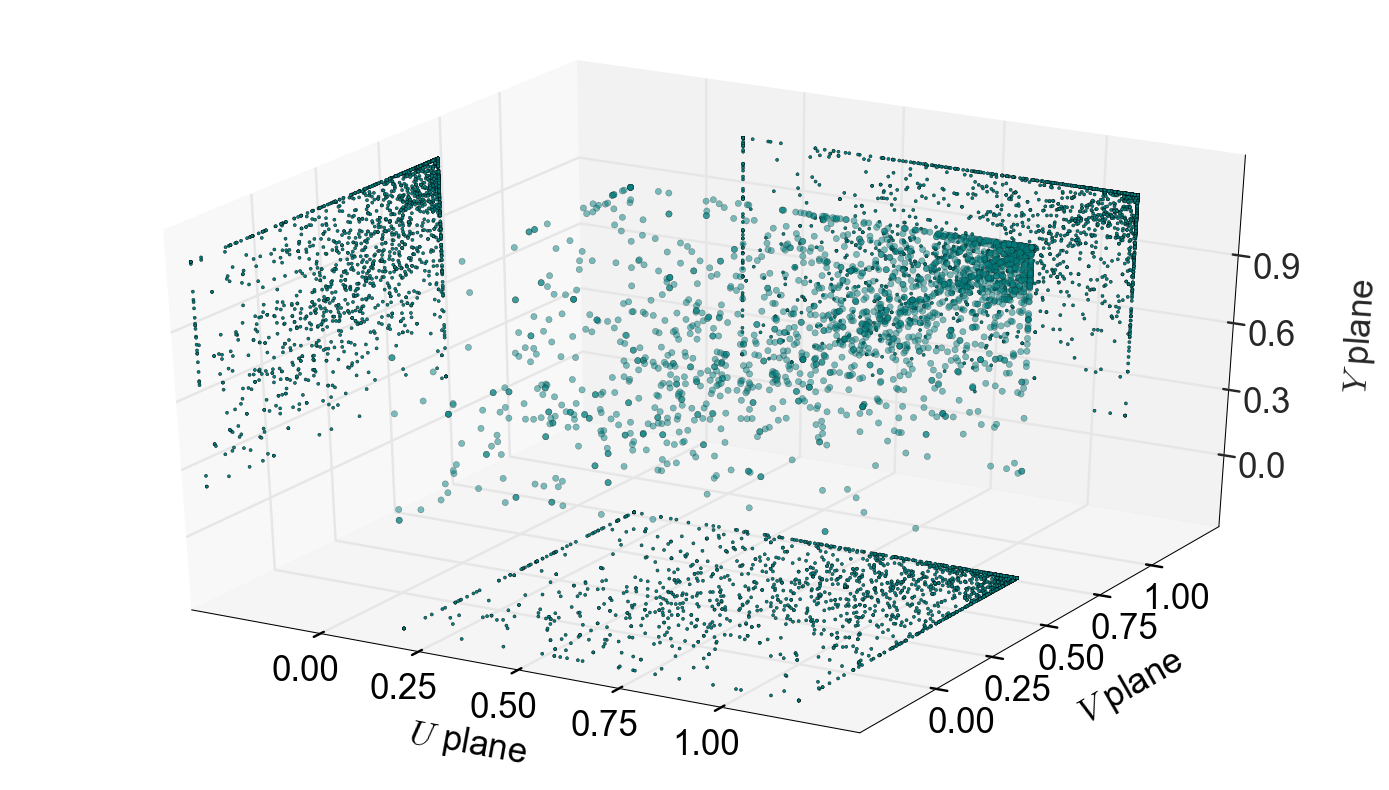

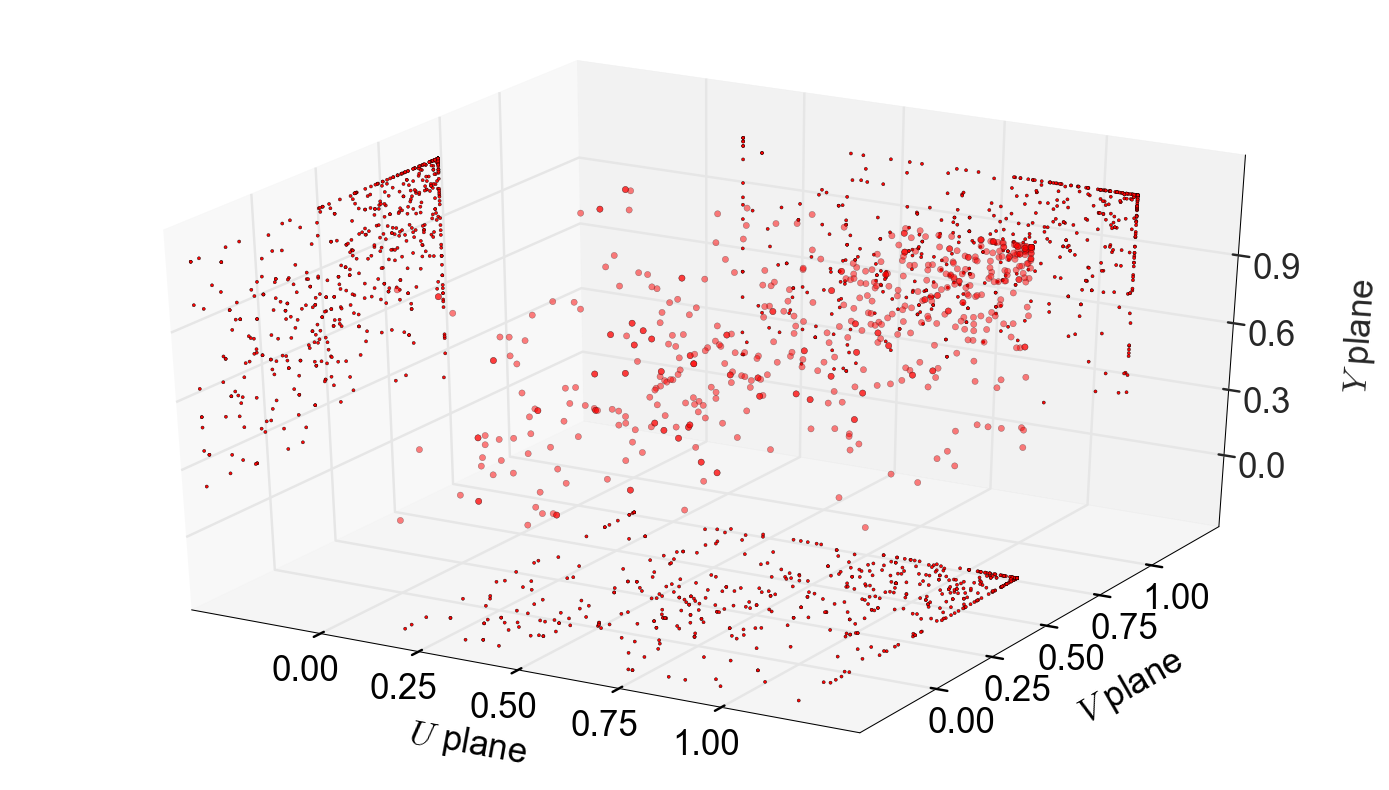

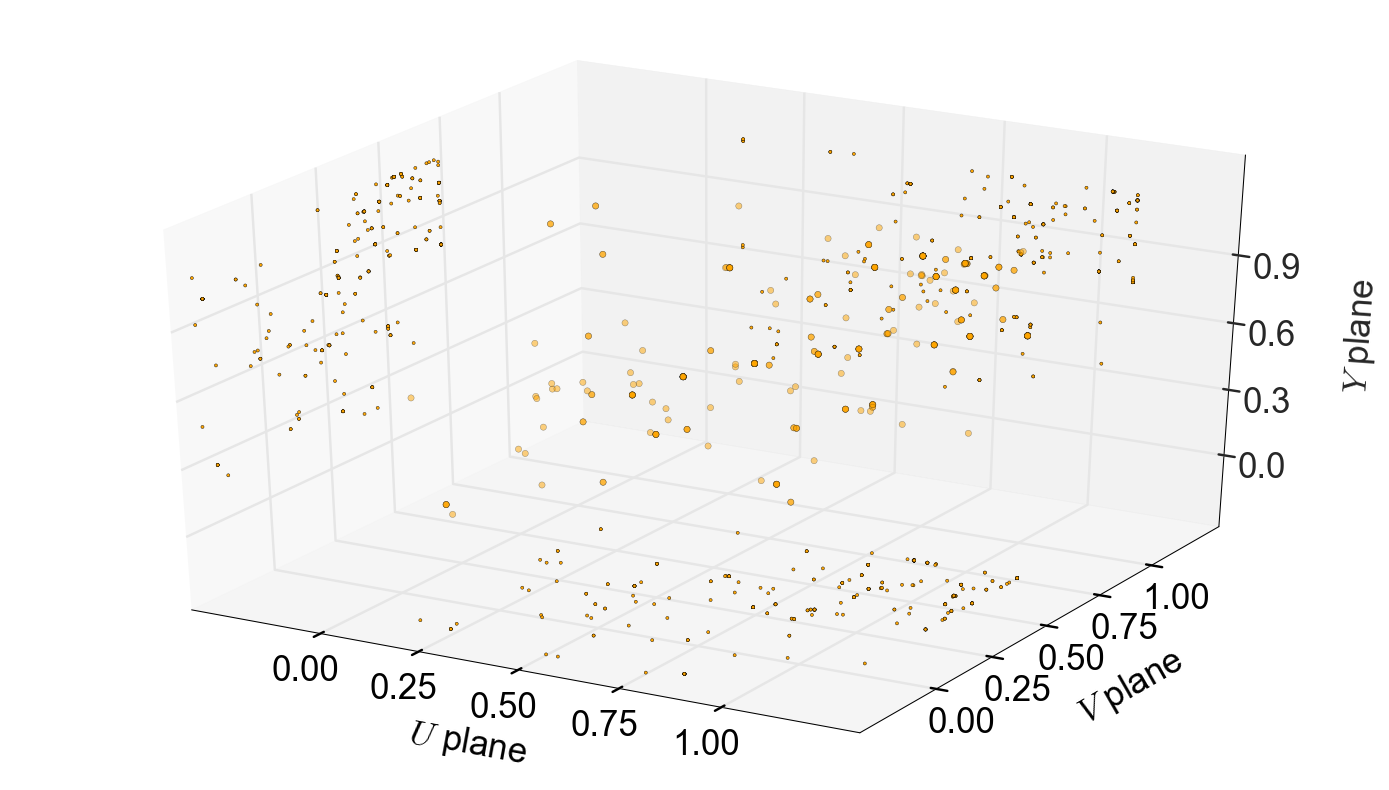

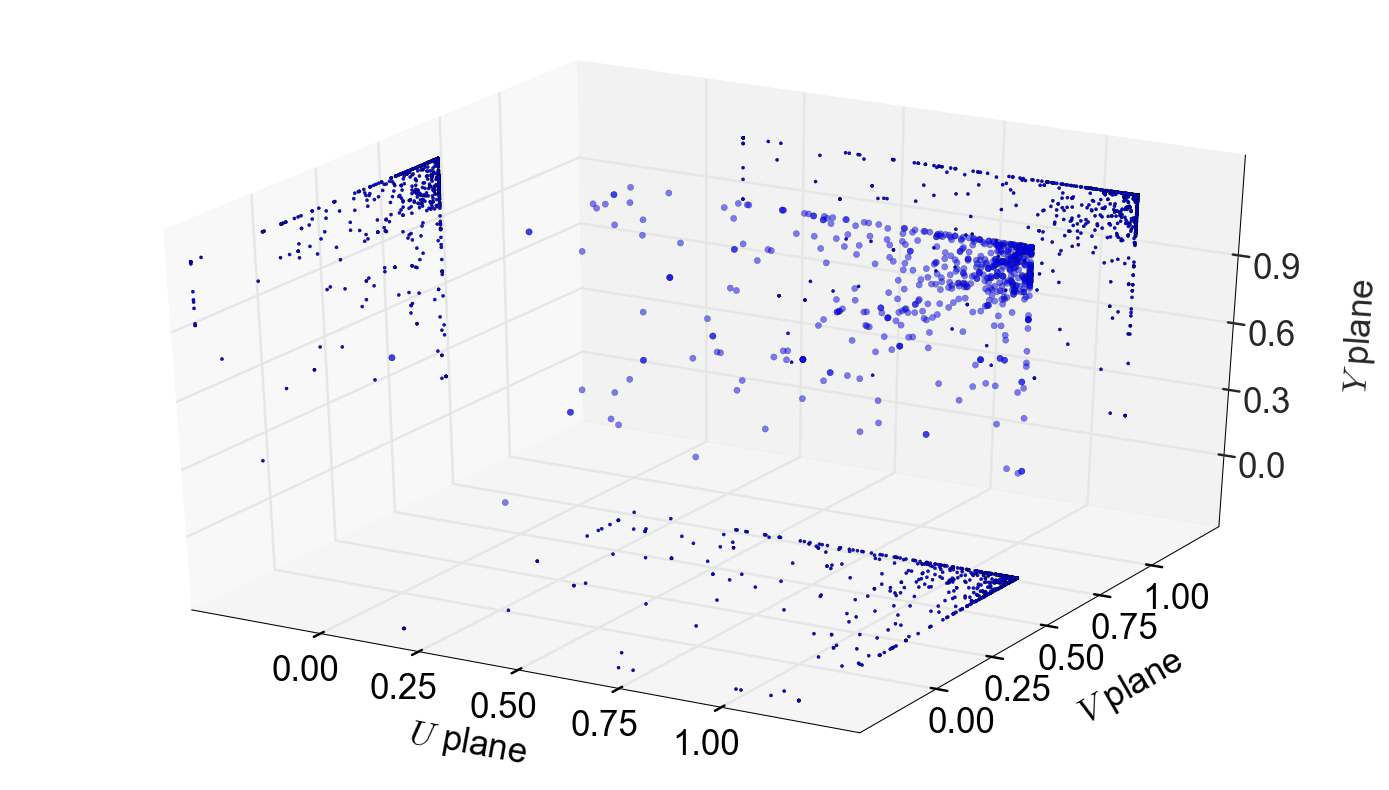

In [7]:
for i_pair_type in range(4):
    pair_type = pair_types[i_pair_type]; color=MCcolors[i_pair_type]; label=MClabels[i_pair_type]
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
    u,v,y = sample[Ru], sample[Rv], sample[Ry]
    fig3D = plt.figure(figsize=(14,8)).gca(projection='3d')
    fig3D.scatter( u , v , y , c=color, s=20 , alpha=0.5 )
    fig3D.scatter(u, y, color=color, zdir='y', s=5, zs=1.5 , edgecolors='black') 
    fig3D.scatter(v, y, color=color, zdir='x', s=5, zs=-0.5 , edgecolors='black')
    fig3D.scatter(u, v, color=color, zdir='z', s=5, zs=-0.5 , edgecolors='black')
    fig3D.set_xlim(-0.3,1.3);fig3D.set_ylim(-0.3,1.3);fig3D.set_zlim(-0.3,1.3)
    set_axes(fig3D,x_label='$U$ plane',y_label='$V$ plane',z_label='$Y$ plane'
             ,xticks=[0,0.25,0.5,0.75,1],yticks=[0,0.25,0.5,0.75,1],zticks=[0,0.3,0.6,0.9])
    fig3D.xaxis.labelpad = 30 ; fig3D.yaxis.labelpad = 30 ; fig3D.zaxis.labelpad = 30
    plt.tight_layout()
    plt.savefig(figures_path + 'ChosenBoxDimensions_pairtype_%d.pdf'%i_pair_type)

## try a cut in a sphere centered around 1 - select its radius
## + add all those events with R=1 in either of the planes

In [8]:
def pureff_in_RdQ_sphere(radius=None, i_optimal_box_size=9, debug=0):    
    '''
    return: 
            purity,efficiency of µp
    also:   purity,efficiency of CC1p0π
    '''
    if debug>1: print 'computing impact of cut on optimal box dimensions: (%d wires x %d ticks)'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    box_dims = '[%d wires x %d ticks]'%(NwiresBox[i_optimal_box_size],NticksBox[i_optimal_box_size])
    Ru = 'RdQaroundVertex[plane 0]'+box_dims
    Rv = 'RdQaroundVertex[plane 1]'+box_dims
    Ry = 'RdQaroundVertex[plane 2]'+box_dims
    reduced = dict()
    for pair_type in pair_types:
        sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
        reduced[pair_type] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                 | 
                                 (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= radius) 
                                ]
    eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = get_pureff_MCbnbDATAcosmic_cut(cut_name='vertex activity', reduced_MCbnbDATAcosmic=reduced)
    if debug:
        print "radius:",radius
        print "eff_mup,pur_mup,(eff_mup*pur_mup):",eff_mup,pur_mup,(eff_mup*pur_mup)
        print "pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi):",pur_CC1p0pi,eff_CC1p0pi,(eff_CC1p0pi*pur_CC1p0pi)
    return eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi

# for MC bnb + MC cosmic replace with:
#         sam = reduced_MCbnbMCcosmicSamples['closest-flash dYZ'][pair_type]        
#         reduced[pair_type] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
#                                  | 
#                                  (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= radius) 
#                                 ]
#     eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = get_pureff_MCbnbMCcosmic_cut(cut_name='vertex activity', reduced_MCbnbMCcosmic=reduced)

In [9]:
debug=0
radius_array = np.linspace(.1,1,100)
pureff_mup,pureff_CC1p0p = [],[]
for i_radius,radius in enumerate(radius_array):
    if (i_radius%(10)==0): print 'i_radius:',i_radius
    eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = pureff_in_RdQ_sphere(radius=radius,
                                                                   i_optimal_box_size=i_box_size, 
                                                                   debug=debug)
    pureff_mup.append(eff_mup*pur_mup)
    pureff_CC1p0p.append(eff_CC1p0pi*pur_CC1p0pi)

print 'done'

i_radius: 0
i_radius: 10
i_radius: 20
i_radius: 30
i_radius: 40
i_radius: 50
i_radius: 60
i_radius: 70
i_radius: 80
i_radius: 90
done


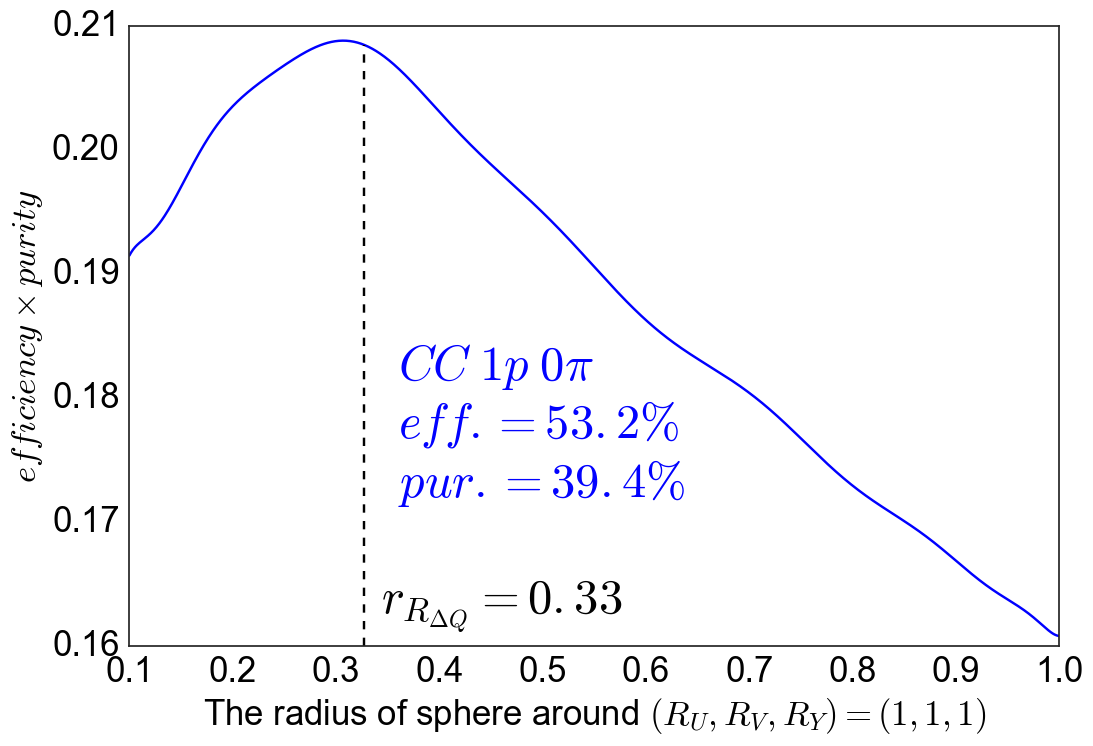

In [14]:
fig,ax=plt.subplots(figsize=(12,8))
i_pair_type = 3
pureff = pureff_CC1p0p
x = radius_array
y = np.array(pureff)*1e-4
# plt.plot(x, y ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])


popt = np.polyfit( x, y , 15)
poly = np.poly1d(popt)
x_poly = np.linspace(.1,1,1000)
y_poly = poly(x_poly)
plt.plot(x_poly, y_poly ,color=MCcolors[i_pair_type],label=MClabels[i_pair_type])


set_axes(ax,'The radius of sphere around $(R_U,R_V,R_Y)=(1,1,1)$','$efficiency \\times purity$'
         ,do_add_legend=False
        )
# best point
i_max = np.argmax(y)
# i_max = 20
r_max = radius_array[i_max]
plt.plot([r_max,r_max],[np.min(ax.get_ylim()),poly(r_max)],'--',color='black')
eff_mup,pur_mup,eff_CC1p0pi,pur_CC1p0pi = pureff_in_RdQ_sphere(radius=r_max, i_optimal_box_size=9, debug=0)

plt.text(1.05*r_max,0.775*y[i_max],r'$r_{R_{\Delta Q}}=%.2f$'%r_max,fontsize=35 ,color='black')
plt.text(1.1*r_max,0.82*y[i_max],'$CC\;1p\;0\pi$\n$eff.=%.1f'%eff_CC1p0pi+'\%$'+'\n$pur.=%.1f'%pur_CC1p0pi+'\%$',fontsize=35 ,color=MCcolors[3])
plt.savefig(figures_path+'cut_optimization_rRdQ.pdf')